### Import basic modules

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Import dataset

In [18]:
# df = pd.read_csv('data/Dataset.csv')

### I/ Data cleansing (and export)
 
Using our speculations, deductions and conclusions in documentation/cleansing.md report, we would like to introduce some cleansing methods for this datasets as shown below. 

In [19]:
# import modules.cleansing as cl

# df = cl.remove_columns(df, ['PATIENT_TYPE'])
# df = cl.remove_invalid_values(df)
# df = cl.mapping_bool_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE', 'CLASIFFICATION_FINAL'])
# df_original = df.copy()
# # df = cl.remove_outliers(df, 'AGE')
# df = cl.impute_missing_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE'])

In [20]:
# df.to_csv('data/Dataset_revised_new.csv', index=False)
# df_original.to_csv('data/Dataset_revised_org.csv', index=False)
# df.describe()

### II/ Descriptive Statistics and Data Visualisation: 
 


In [21]:
df_original = pd.read_csv('data/Dataset_revised_org.csv')
df = pd.read_csv('data/Dataset_revised_new.csv')

/tmp/ipykernel_157579/2795104614.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('data/Dataset_revised_org.csv')
/tmp/ipykernel_157579/2795104614.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Dataset_revised_new.csv')


In [22]:
new_column_list = []
for column in df.columns:
    if column not in ['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED']:
        new_column_list.append(column)

analytics_df_main = df[new_column_list].copy()
analytics_df_main

,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2.0,1.0,0.0,55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,1.0,0.0,1.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,1.0,0.0,0.0,37,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
3,1.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,2.0,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200026,1.0,0.0,1.0,61,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
200027,1.0,0.0,1.0,63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
200028,1.0,0.0,0.0,23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
200029,1.0,0.0,0.0,56,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


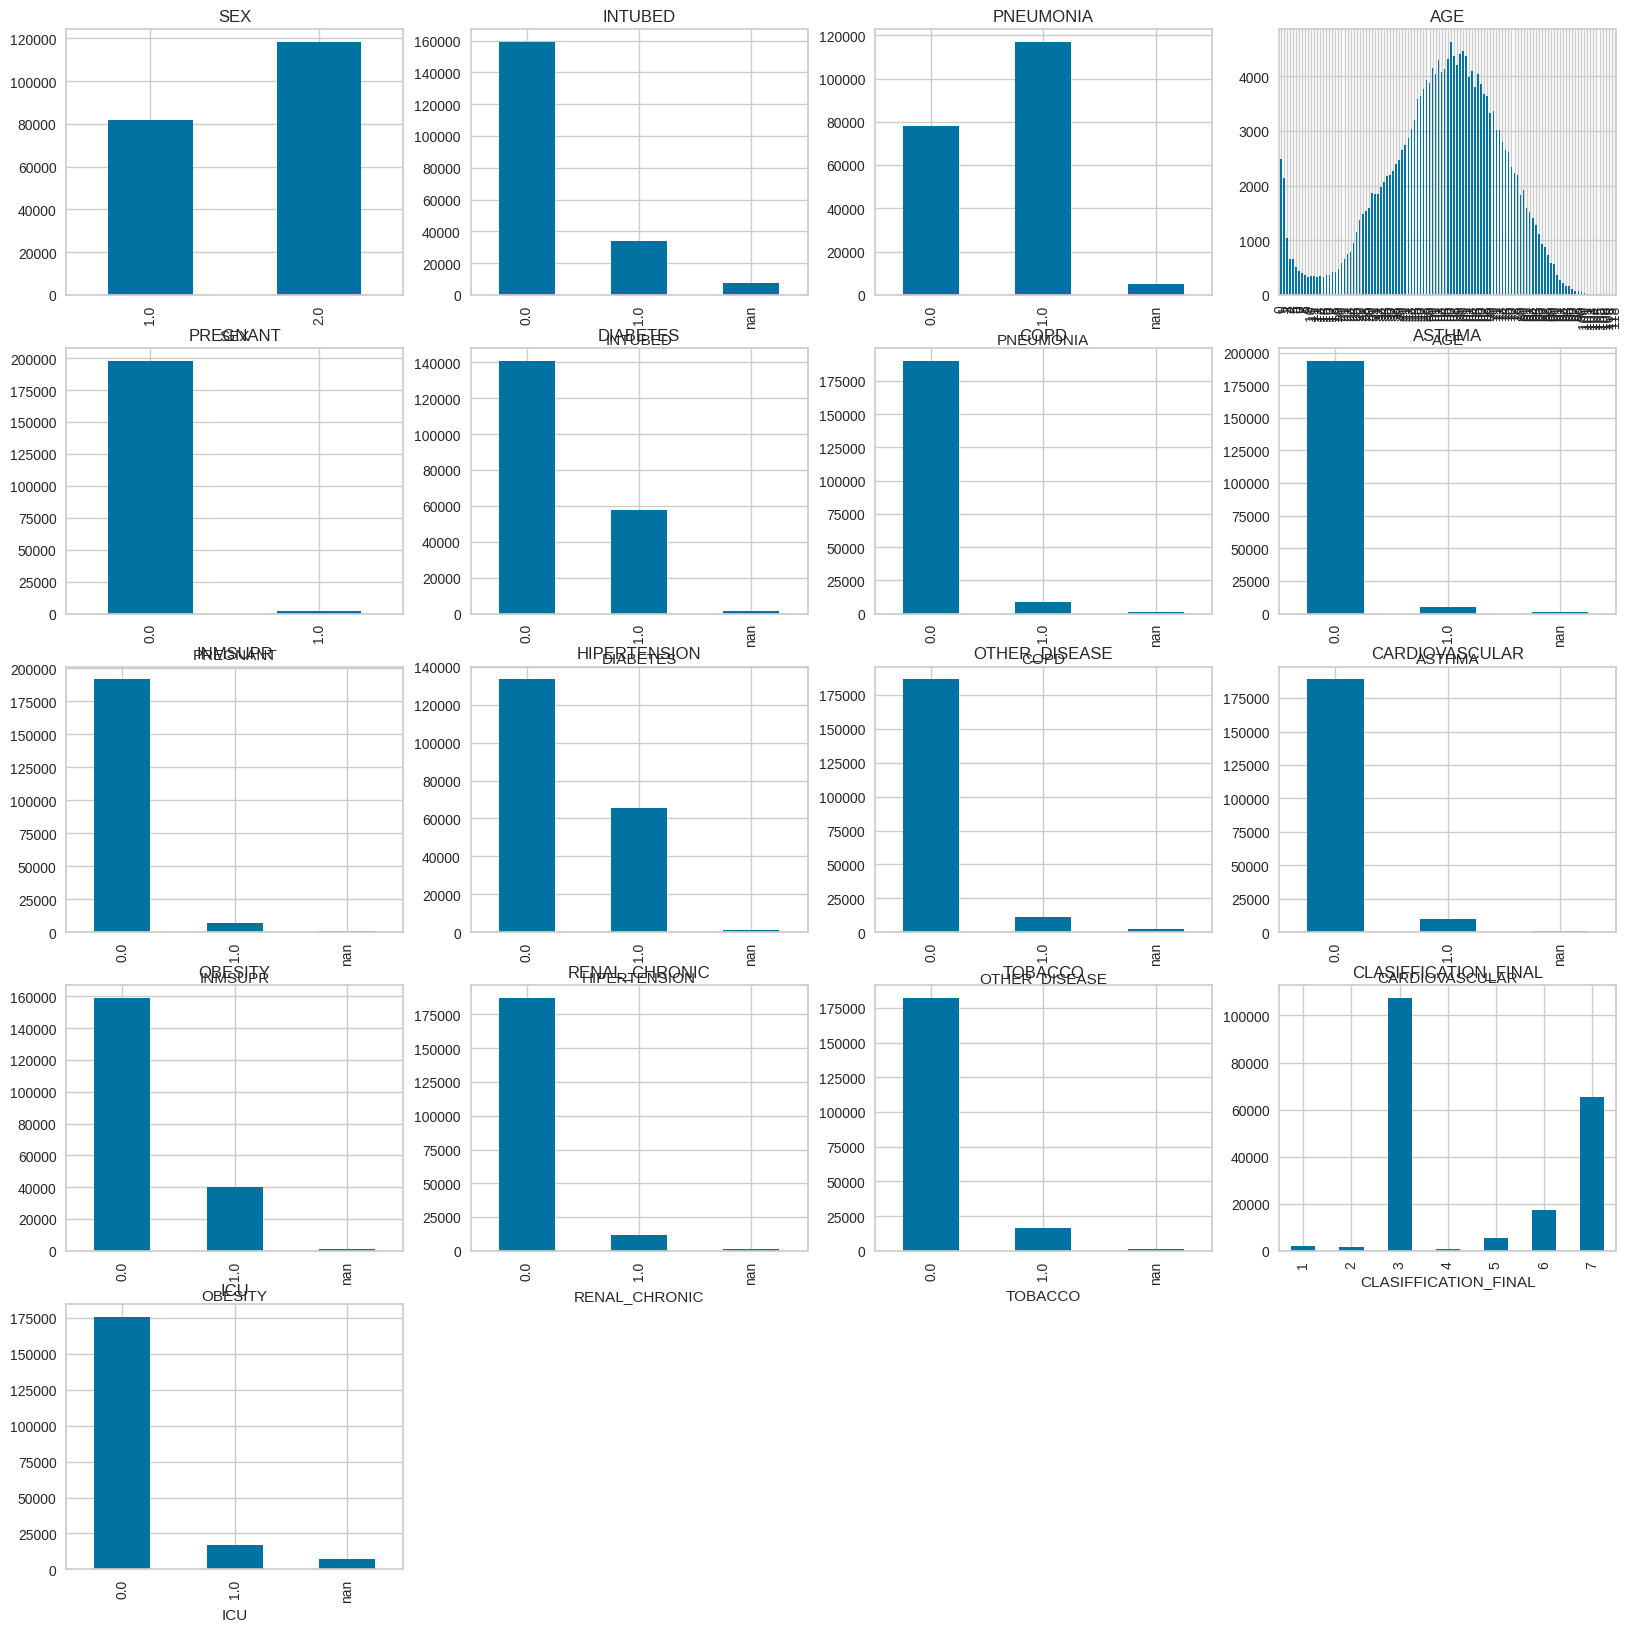

In [23]:
import modules.analytics_helper as ah

org_analytics_df = df_original[new_column_list].copy()
# analytics_df
# print(org_analytics_df['PNEUMONIA'])

ah.plot_multiple_metrics(df=org_analytics_df, columns=new_column_list, figsize=(20, 20))

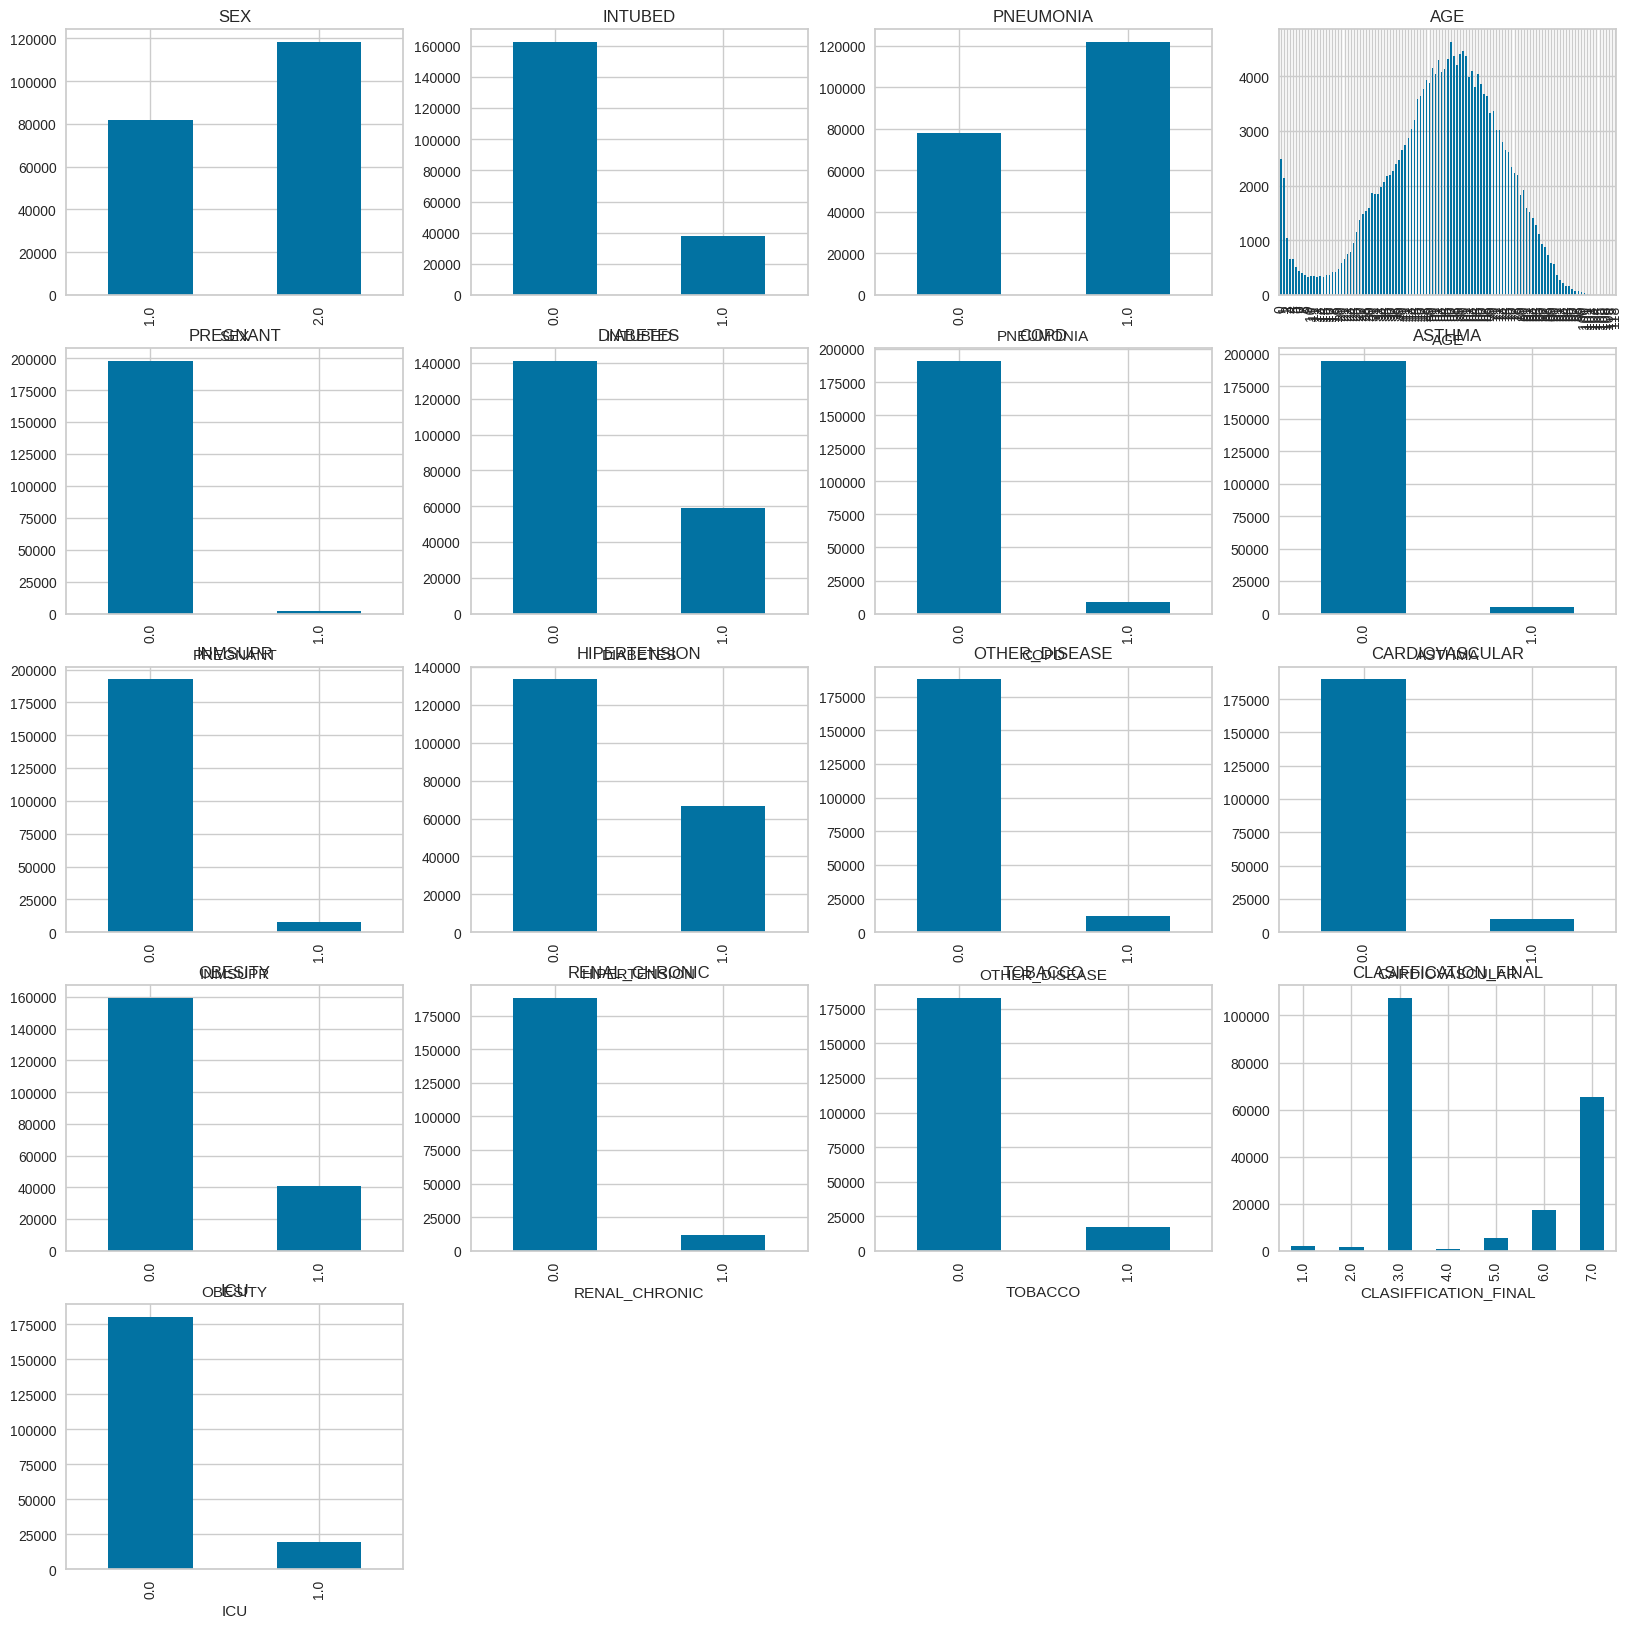

In [24]:
import modules.analytics_helper as ah

ah.plot_multiple_metrics(df=analytics_df_main, columns=new_column_list, figsize=(20, 20))

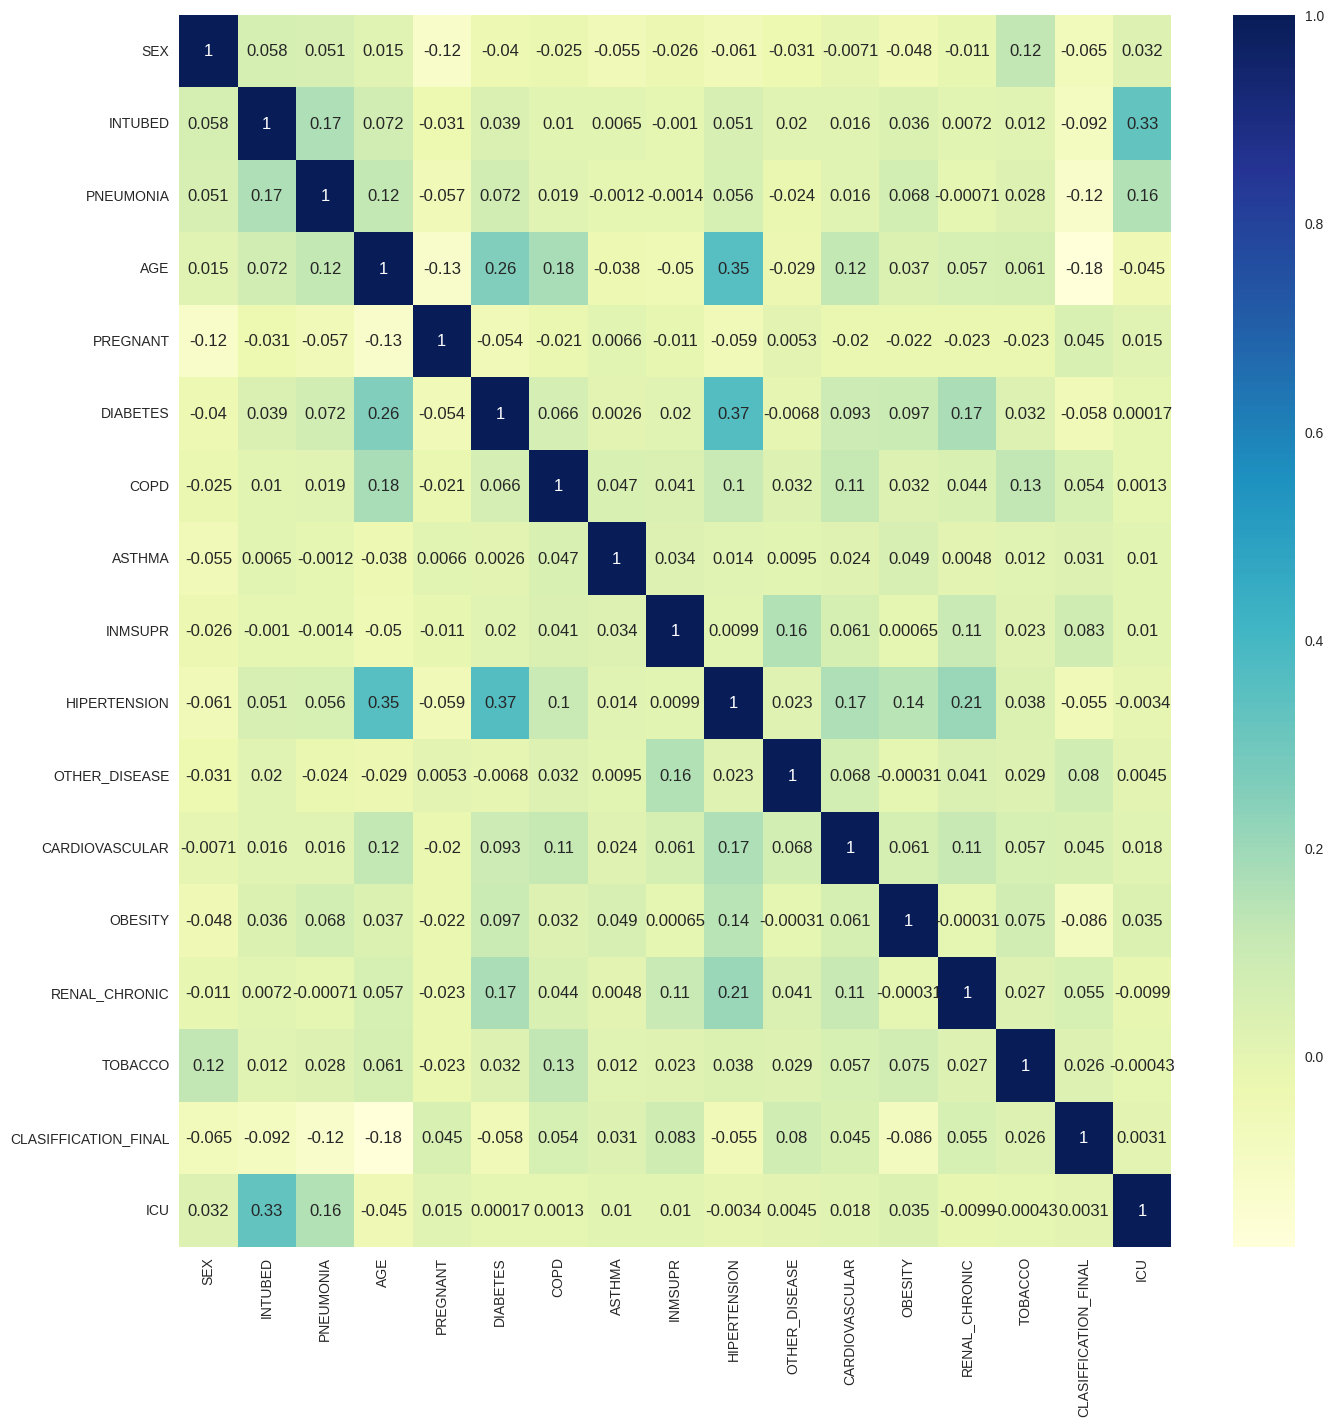

In [25]:
plt.figure(figsize=(16, 16))
co_mtx = analytics_df_main.corr(method ='pearson')

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

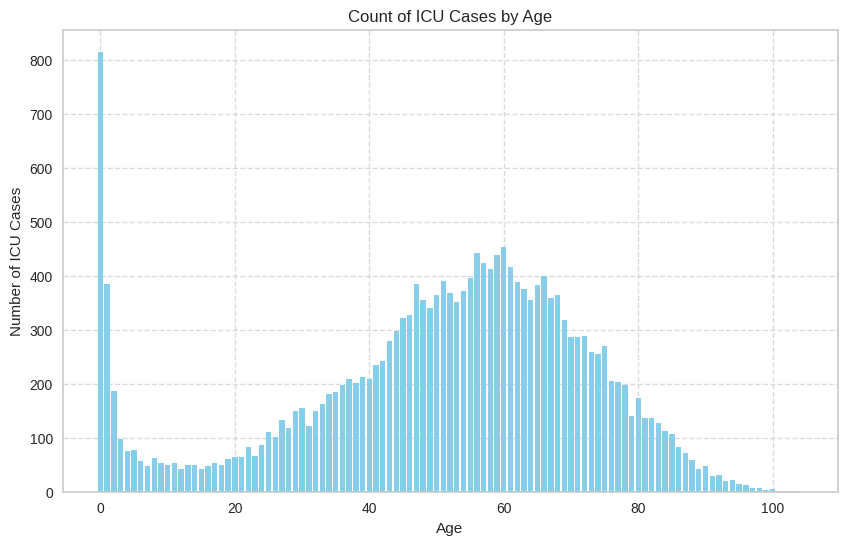

In [26]:
icu_by_age = analytics_df_main[analytics_df_main['ICU'] == 1.0].groupby('AGE').size().reset_index(name='ICU_Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(icu_by_age['AGE'], icu_by_age['ICU_Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of ICU Cases')
plt.title('Count of ICU Cases by Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### III/ Model

In [27]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif, VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import modules.modeling as md
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
import modules.modeling_pyspark as mdp

# Discretize features into bins (e.g., 5 bins)
y = analytics_df_main['ICU']
X = analytics_df_main.drop(['ICU', 'CLASIFFICATION_FINAL'], axis=1)

analytics_df = analytics_df_main.drop(['CLASIFFICATION_FINAL'], axis=1)
# analytics_df['AGE'] = pd.cut(analytics_df['AGE'], bins=10, labels=False)


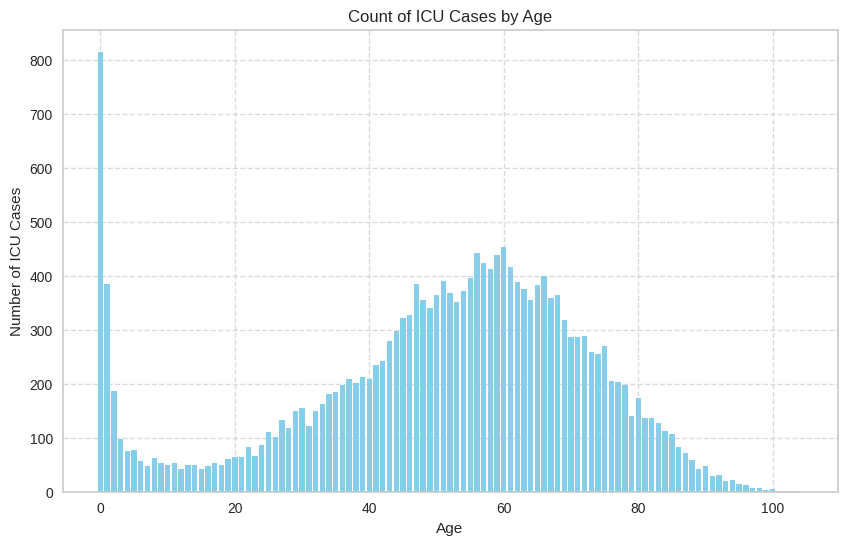

In [28]:
analytics_df = md.cleanDataForModeling(analytics_df)

icu_by_age = analytics_df_main[analytics_df_main['ICU'] == 1.0].groupby('AGE').size().reset_index(name='ICU_Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(icu_by_age['AGE'], icu_by_age['ICU_Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of ICU Cases')
plt.title('Count of ICU Cases by Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [29]:
from collections import Counter

analytics_df = md.cleanDataForModeling(analytics_df)
occurence = []
count = 0
occurence = occurence + md.feature_selection_coefficient(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_mutual_info(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_anova(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_chi2(df=analytics_df, target_column='ICU', continuous_columns=[], select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_rfe(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
select_feature_probability = dict(Counter(occurence))
select_feature_probability = {k:float(v/count) for k, v in select_feature_probability.items()}
print(select_feature_probability)

Correlations with target:
INTUBED           0.326269
PNEUMONIA         0.155660
OBESITY           0.035380
SEX               0.032110
CARDIOVASCULAR    0.017832
PREGNANT          0.015103
INMSUPR           0.010256
ASTHMA            0.010072
OTHER_DISEASE     0.004523
COPD              0.001298
DIABETES          0.000168
TOBACCO          -0.000426
HIPERTENSION     -0.003412
RENAL_CHRONIC    -0.009862
AGE              -0.044928
dtype: float64
Top 6 features: ['INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY', 'SEX', 'CARDIOVASCULAR']
----------------------------------------------------------------------------------------------------
Mutual Information Scores:
INTUBED           0.043605
PNEUMONIA         0.043481
SEX               0.031908
HIPERTENSION      0.011401
DIABETES          0.009245
OBESITY           0.004224
AGE               0.003600
TOBACCO           0.001251
COPD              0.000646
RENAL_CHRONIC     0.000561
INMSUPR           0.000478
PREGNANT          0.000325
OTHER_DISEASE     

### Logistic Regression Model with PySpark

#### 1. 5 chosen features: 'SEX', 'INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY'

In [30]:
# 5 chosen features: 'INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY', 'SEX'
# ['INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'ASTHMA', 'OTHER_DISEASE']
analytics_df = analytics_df_main[['SEX', 'INTUBED', 'PNEUMONIA', 'AGE', 'OBESITY','ICU']]
analytics_df.to_csv('data/Dataset_revised_pyspark.csv', index=False)

#Apply MinMax Scaler
analytics_df = md.cleanDataForModeling(analytics_df)

##### Apply Logistic Regression model with PySpark to dataset

root
 |-- SEX: double (nullable = true)
 |-- INTUBED: double (nullable = true)
 |-- PNEUMONIA: double (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- OBESITY: double (nullable = true)
 |-- ICU: double (nullable = true)



+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+
|summary|               SEX|            INTUBED|          PNEUMONIA|              AGE|            OBESITY|                ICU|
+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+
|  count|            200031|             200031|             200031|           200031|             200031|             200031|
|   mean|1.5914333278341857|0.18820582809664502| 0.6089606111052787|52.77003064524999|0.20333848253520703|0.09752988286815543|
| stddev|0.4915700912176145|0.39087742090648214|0.48798440106925334|19.82984587636618|  0.402483234301421|0.29667868955976645|
|    min|               1.0|                0.0|                0.0|                0|                0.0|                0.0|
|    25%|               1.0|                0.0|                0.0|               41|                0.0|     

Training Accuracy: 0.9047910703348624
Test Accuracy: 0.9046096189881324
ROC AUC Score: 0.7683682748550859


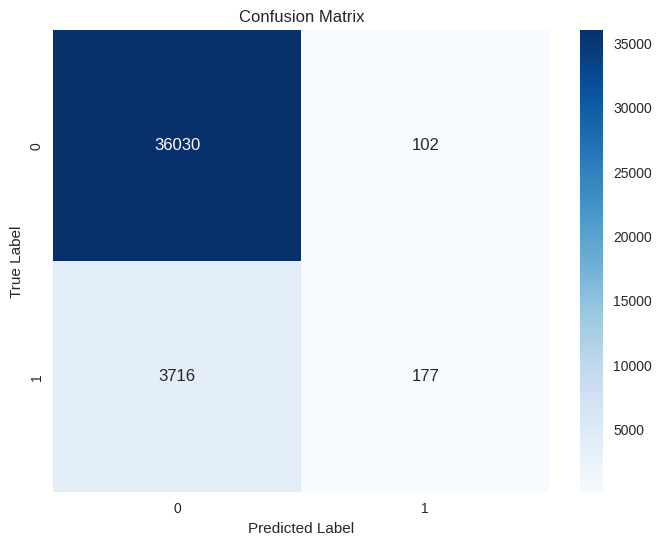


Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     36132
           1       0.63      0.05      0.08      3893

    accuracy                           0.90     40025
   macro avg       0.77      0.52      0.52     40025
weighted avg       0.88      0.90      0.87     40025



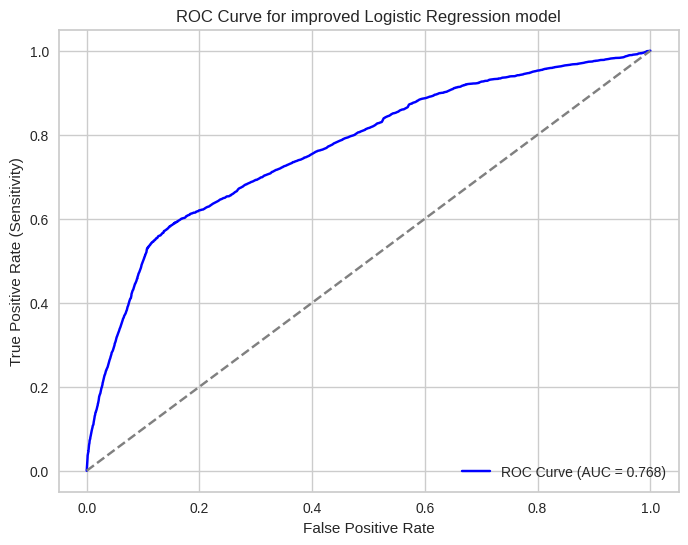

In [31]:
mdp.trainAndTestImprovedModel(DATA_PATH='data/Dataset_revised_pyspark.csv', sampling=None)

##### Apply Logistic Regression model to oversampling dataset

root
 |-- SEX: double (nullable = true)
 |-- INTUBED: double (nullable = true)
 |-- PNEUMONIA: double (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- OBESITY: double (nullable = true)
 |-- ICU: double (nullable = true)



+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+
|summary|               SEX|            INTUBED|          PNEUMONIA|              AGE|            OBESITY|                ICU|
+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+
|  count|            200031|             200031|             200031|           200031|             200031|             200031|
|   mean|1.5914333278341857|0.18820582809664502| 0.6089606111052787|52.77003064524999|0.20333848253520703|0.09752988286815543|
| stddev|0.4915700912176145|0.39087742090648214|0.48798440106925334|19.82984587636618|  0.402483234301421|0.29667868955976645|
|    min|               1.0|                0.0|                0.0|                0|                0.0|                0.0|
|    25%|               1.0|                0.0|                0.0|               41|                0.0|     

Training Accuracy: 0.7160497246175629
Test Accuracy: 0.8000499687695191
ROC AUC Score: 0.7686810319521115


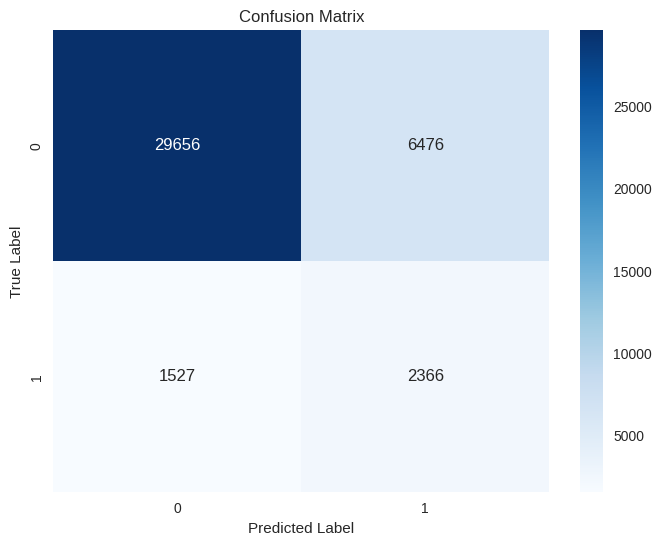


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88     36132
           1       0.27      0.61      0.37      3893

    accuracy                           0.80     40025
   macro avg       0.61      0.71      0.63     40025
weighted avg       0.88      0.80      0.83     40025



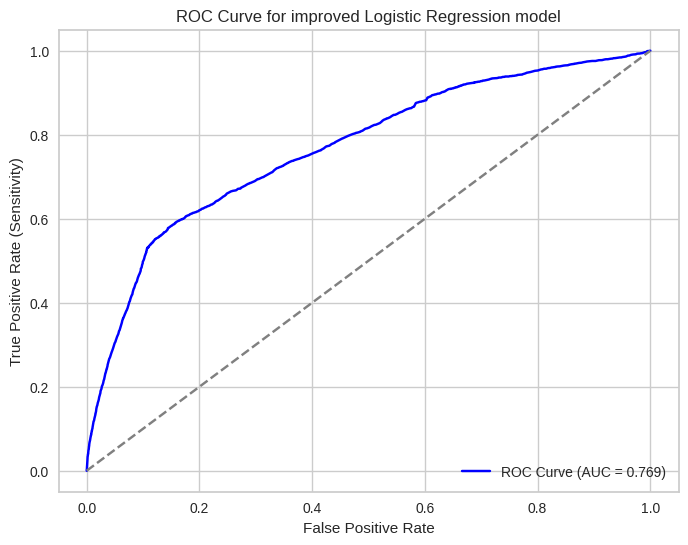

In [32]:
mdp.trainAndTestImprovedModel(DATA_PATH='data/Dataset_revised_pyspark.csv', sampling='oversampling')

root
 |-- SEX: double (nullable = true)
 |-- INTUBED: double (nullable = true)
 |-- PNEUMONIA: double (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- OBESITY: double (nullable = true)
 |-- ICU: double (nullable = true)



+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+
|summary|               SEX|            INTUBED|          PNEUMONIA|              AGE|            OBESITY|                ICU|
+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+
|  count|            200031|             200031|             200031|           200031|             200031|             200031|
|   mean|1.5914333278341857|0.18820582809664502| 0.6089606111052787|52.77003064524999|0.20333848253520703|0.09752988286815543|
| stddev|0.4915700912176145|0.39087742090648214|0.48798440106925334|19.82984587636618|  0.402483234301421|0.29667868955976645|
|    min|               1.0|                0.0|                0.0|                0|                0.0|                0.0|
|    25%|               1.0|                0.0|                0.0|               41|                0.0|     

Training Accuracy: 0.9047910703348624
Test Accuracy: 0.9046096189881324
ROC AUC Score: 0.7683682748550859


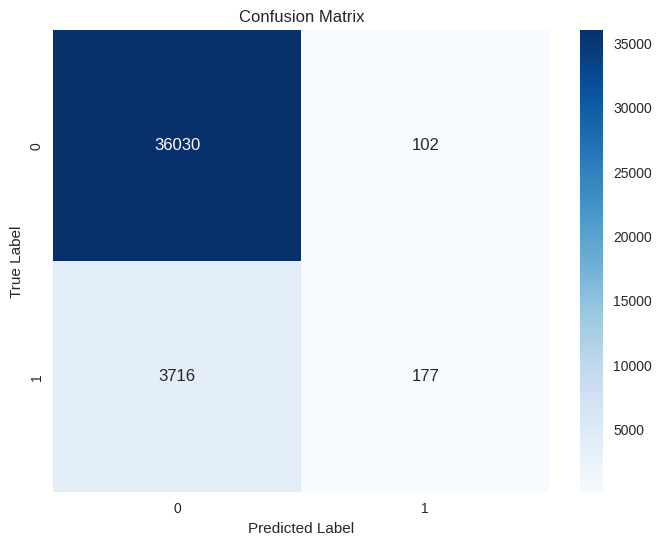


Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     36132
           1       0.63      0.05      0.08      3893

    accuracy                           0.90     40025
   macro avg       0.77      0.52      0.52     40025
weighted avg       0.88      0.90      0.87     40025



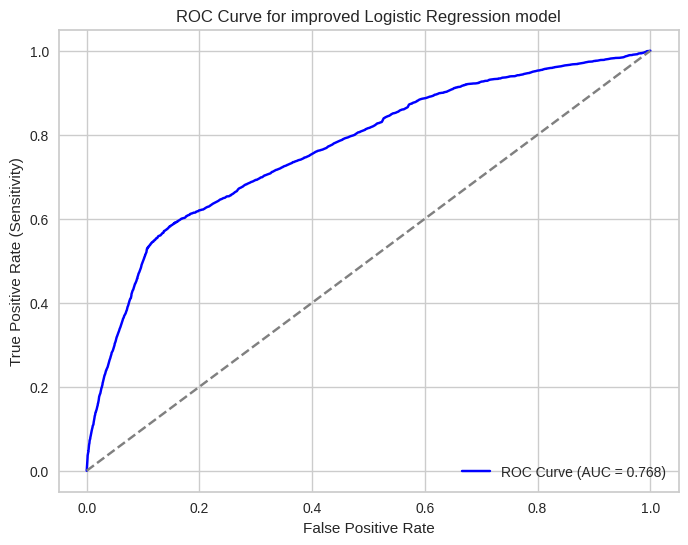

In [33]:
mdp.trainAndTestImprovedModel(DATA_PATH='data/Dataset_revised_pyspark.csv', sampling='undersampling')